In [1]:
from numpy import array,empty,linspace,arange,ones
from pylab import scatter, xlabel, ylabel, xlim, ylim, show,plot
from numpy import loadtxt

from math import sqrt

Exercise 2.9: Madelung Constant
Set different values of L and pick i, j, k that are between -L and L+1. Check to make sure i=j=k=0 doesn't happen, then check for i+j+k = even or odd. The measured value of the constant gor NaCl is -1.748



In [2]:


L=10
M=0.0
for i in range (-L,L+1):
    for j in range (-L,L+1):
        for k in range (-L,L+1):
            if i==0 and j==0 and k ==0:
                continue
            if (i+j+k)%2==0:   #even
                M+= 1/sqrt(i*i+j*j+k*k)
            else:
                M-= 1/sqrt(i*i+j*j+k*k)
            print(M)
print(round(M,3))

0.057735026919
-0.00191997170823
0.0596257737814
-0.00374665127101
0.0613478042194
-0.00531886244726
0.0627225192967
-0.00644892708989
0.0635650771115
-0.00696948447435
0.0637411936443
-0.00679336794156
0.0632206362598
-0.00595081012676
0.0620905716172
-0.00457609504945
0.060518360441
-0.00285406461149
0.0586916808782
-0.000963317749013
0.0567717091699
-0.00288328945724
0.0588969168643
-0.00499073963571
0.0609473077039
-0.00693711562635
0.0627361858028
-0.00851086418509
0.0640367608259
-0.00948470138347
0.0646402302826
-0.00968918434208
0.064435747324
-0.00908571488535
0.0634619101256
-0.00778513986226
0.0618881615669
-0.00599626176331
0.0599417855763
-0.00394587092373
0.0578343353978
-0.00182066322939
0.0597250822603
-0.00416257423972
0.0620640436135
-0.00645482736922
0.0642558507494
-0.0084834459959
0.0660521532541
-0.00997643887288
0.0671752361082
-0.010674658308
0.0674122226363
-0.0104376717798
0.0667140032012
-0.00931458892576
0.0652210103242
-0.00751828642109
0.0631923916976
-0.0

# Exercise 2.11
write two functions one for factorial and one for binomial

In [158]:
def factorial(n): #assumes n is an integer. Very inelegant failure if not
    f=1.0
    
    if n==0:
        return 1 #check for n=0
    else:
        for k in range(1,n+1):
            f*=k
    return f

In [159]:
def binomial(n,k):
    if k==0:
        return 1
    else:
        binomial=factorial(n)/(factorial(k)*factorial(n-k))
    return binomial

now to build Pascal's triangle

In [161]:
nmax=10

for n in range(1,nmax+1):
    pascal_line=[]
    for k in range(0,n+1):
        pascal_line.append(binomial(n,k))
    print(pascal_line)

[1, 1.0]
[1, 2.0, 1.0]
[1, 3.0, 3.0, 1.0]
[1, 4.0, 6.0, 4.0, 1.0]
[1, 5.0, 10.0, 10.0, 5.0, 1.0]
[1, 6.0, 15.0, 20.0, 15.0, 6.0, 1.0]
[1, 7.0, 21.0, 35.0, 35.0, 21.0, 7.0, 1.0]
[1, 8.0, 28.0, 56.0, 70.0, 56.0, 28.0, 8.0, 1.0]
[1, 9.0, 36.0, 84.0, 126.0, 126.0, 84.0, 36.0, 9.0, 1.0]
[1, 10.0, 45.0, 120.0, 210.0, 252.0, 210.0, 120.0, 45.0, 10.0, 1.0]


# Exercise 3.1

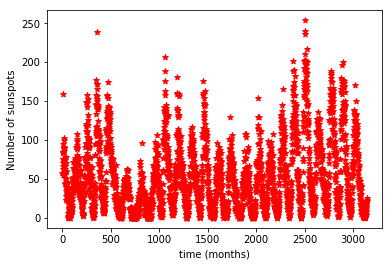

In [143]:

data=loadtxt("sunspots.txt",float) # load sunspots data
x=data[:,0]#we're told that the first column is the "date" in months
y=data[:,1]#number of sunspots in second column
scatter(x,y,c='r', marker='*') #plot as a scatter plot with red stars, b/c why not?
                                #see https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html for details
xlabel("time (months)")
ylabel("Number of sunspots")

show()

Now just plot the first 1000 points. Use slicing to accomplish

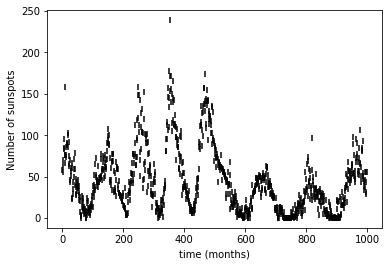

In [145]:
data=loadtxt("sunspots.txt",float) #strictly speaking I don't need to 
x=data[0:999,0]
y=data[0:999,1]
scatter(x,y,c='k',marker="|") #plot with vertical lines, b/c I want to
xlabel("time (months)")
ylabel("Number of sunspots")

show()

In [ ]:
#For the running average I decided to write a function to make the code a liitle clearer

In [89]:
def running_average(data,num_points): #data is the data to be averaged, num_points are the number of points
                                      # on either side of a data point for averageing

    avg=empty(len(data)-2*num_points,float) #create an array that will hold the averaged data. We can't start until
                                            #num_points into data and we have to end num_points before the end, so 
        
    
    for k in range(num_points,len(data)-num_points):#have to be careful of the edges of the array.
                                                    #If we start at data[0] and try to extract data[-numpoints] we get an error
        sum=0.
        for i in range(-num_points,num_points): #range of averate
            sum+=data[i+k]#sum
        avg[k-num_points]=sum/(num_points*2+1) #store in average array
    return(avg) #return the running average

11
3121


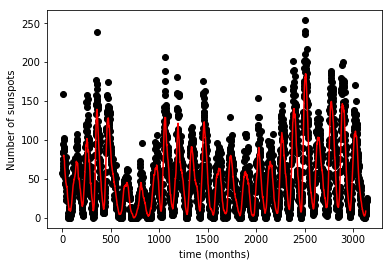

In [146]:
data=loadtxt("sunspots.txt",float) #again already in memory, but just to be consistant
avg_num=11 #number of points to include in running average
x=data[:,0] 
avg_x=data[avg_num:len(x)-avg_num,0] #create an array for running_average to return to
y=data[:,1]
scatter(x,y,c='k') #plot regular data
xlabel("time (months)")
ylabel("Number of sunspots")
ravg=running_average(y,avg_num) #call running_average
plot(avg_x,ravg,"r") # plot as a plot and not scatter to make a line
show()#show both plots

# Logistic plot

first we are going to define a function, b/c it is good coding. We are iterating $x^{'}=r\times x(1-x)$

In [4]:
def logistic(r,x):
    return(r*x*(1-x))

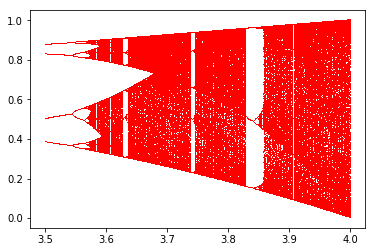

In [14]:
r=arange(3.5,4.,.001) #want to create an array for r. Use numpy function arange to set an array by step size
x=.5*ones(len(r)) #inital conditions for x are supposed to be 0.5

iterations=1000
for i in range(iterations): #burn through the first iterations to get to steady state solution. No transients here!
    x=logistic(r,x) #call the logistic function and set it to x again
for i in range(len(r)):
    x=logistic(r,x) #now for real
    plot(r, x,'r,') #plot
show()


Don't need this for the problem but I wanted to show what x looked like in all its glory for a single r. Glad I wrote a function for logistic!

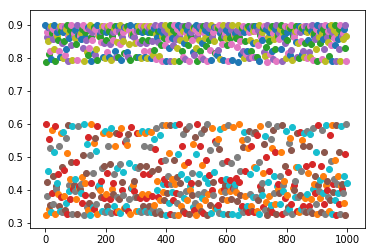

In [13]:
x=.5
r=3.6
iterations=1000
for i in range(iterations):
    x=logistic(r,x)
    scatter(i,x)
show()

Above I chose a value of r that shows that x is bouncing around 4 values. just like we saw on our original graph. If I choose a smaller r. I'll see period 2 behavior

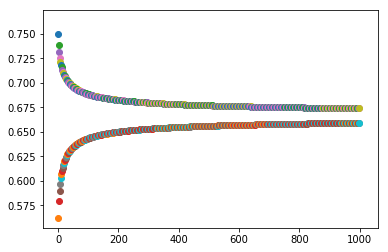

In [11]:
x=0.5
r=3
iterations=1000
for i in range(iterations):
    x=logistic(r,x)
    scatter(i,x)
show()

Still smaller a fixed point

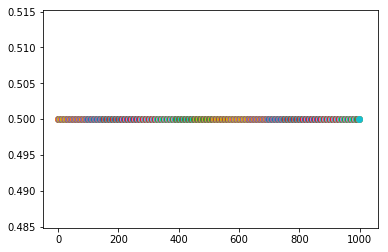

In [152]:
x=0.5
r=2.
iterations=1000
for i in range(iterations):
    x=logistic(r,x)
    scatter(i,x)
show()

For certain rs, it looks chaotic. hmm...

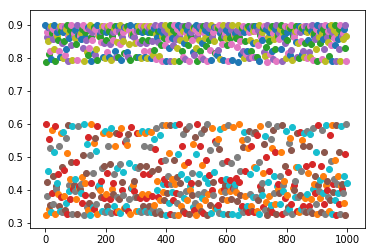

In [156]:
x=0.5
r=3.6
iterations=1000
for i in range(iterations):
    x=logistic(r,x)
    scatter(i,x)
show()

In [1]:
from numpy import sqrt, pi, empty
e=1.6*10**-19 #electron charge
e0=8.85*10**-12 #permittivity
a=5.64*10**-10 #lattice constant
x=e/(4*pi*e0*a)
L=100
v=empty([L,L,L],float)
vtotal=0
for i in range (-L,L):
    for j in range (-L,L):
        for k in range (-L,L):
            if not (i==j==k==0):
                vtotal+=(-1)**(i+j+k)/sqrt(i**2+j**2+k**2)
print("M=",vtotal)

('M=', -1.7475645950377328)


In [ ]:
#Import party
from pylab import plot,show,xlim,ylim,xlabel,ylabel
from numpy import loadtxt,array
#Import party

#Set up plot
data=loadtxt("sunspots.txt",float)
x=data[:,0]
y=data[:,1]
plot(x,y)

xlabel("months since Jan 1749")
ylabel("number of sunspots recorded")
xlim(0,1000)
show()

In [1]:
#2.11 Binomial Coefficients

f=int(input("Enter value,n:"))
g=int(input("Enter value,k:"))
def binomial(n,k):
    def factorial(n):
        for a in range(1,n+1):
            f*=a
        return f
    def factorial2(k):
        for b in range(1,k+1):
            g*=b
        return k
    def factorial3(n,k):
        for c in range(1,(n-k)+1):
            h*=c
        return h
        l=(factorial(n)/factorial2(k)*factorial3(n,k))
        print(l)



Enter value,n:3
Enter value,k:2
